In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
customers_df=pd.read_csv('data/olist_customers_dataset.csv')
geolocation_df=pd.read_csv('data/olist_geolocation_dataset.csv')
order_items_df=pd.read_csv('data/olist_order_items_dataset.csv')
order_payments_df=pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews_df=pd.read_csv('data/olist_order_reviews_dataset.csv')
orders_df=pd.read_csv('data/olist_orders_dataset.csv')
products_df=pd.read_csv('data/olist_products_dataset.csv')
sellers_df=pd.read_csv('data/olist_sellers_dataset.csv')
product_category_name_translation_df=pd.read_csv('data/product_category_name_translation.csv')




### 1-Produits catégories fusion

In [19]:
products = pd.merge(products_df, product_category_name_translation_df,
                    how="left",
                    on="product_category_name")

In [30]:
products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares


In [21]:
cols_to_remove = ["product_category_name", "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm"]
products.drop(cols_to_remove, axis=1, inplace=True)
products = products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
products.head(6)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,housewares
5,41d3672d4792049fa1779bb35283ed13,60.0,745.0,1.0,musical_instruments


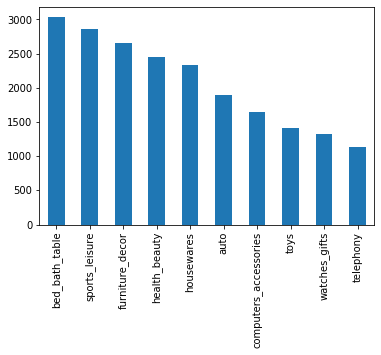

In [22]:
products['product_category_name'].value_counts().sort_values(ascending=False).head(10).plot.bar()

### 2-Commandes articles

In [26]:


order_items = pd.merge(order_items_df, orders_df,
                       how="left",
                       on="order_id")

In [27]:
order_items=order_items[order_items['order_status']=='delivered']

In [28]:
 order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_item_id                  110197 non-null  int64  
 2   product_id                     110197 non-null  object 
 3   seller_id                      110197 non-null  object 
 4   shipping_limit_date            110197 non-null  object 
 5   price                          110197 non-null  float64
 6   freight_value                  110197 non-null  float64
 7   customer_id                    110197 non-null  object 
 8   order_status                   110197 non-null  object 
 9   order_purchase_timestamp       110197 non-null  object 
 10  order_approved_at              110182 non-null  object 
 11  order_delivered_carrier_date   110195 non-null  object 
 12  order_delivered_customer_date 

In [31]:
col_dates=['shipping_limit_date','order_approved_at',
           'order_estimated_delivery_date',
           'order_delivered_carrier_date','order_delivered_customer_date']
for col in col_dates:
    order_items[col] = order_items[col].astype('datetime64[ns]')
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   seller_id                      110197 non-null  object        
 4   shipping_limit_date            110197 non-null  datetime64[ns]
 5   price                          110197 non-null  float64       
 6   freight_value                  110197 non-null  float64       
 7   customer_id                    110197 non-null  object        
 8   order_status                   110197 non-null  object        
 9   order_purchase_timestamp       110197 non-null  object        
 10  order_approved_at              110182 non-null  datetime64[ns]
 11  

In [38]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [50]:
orders_per_days = order_items.groupby(order_items['order_purchase_timestamp'].astype('datetime64[ns]').dt.date).count()['order_id']

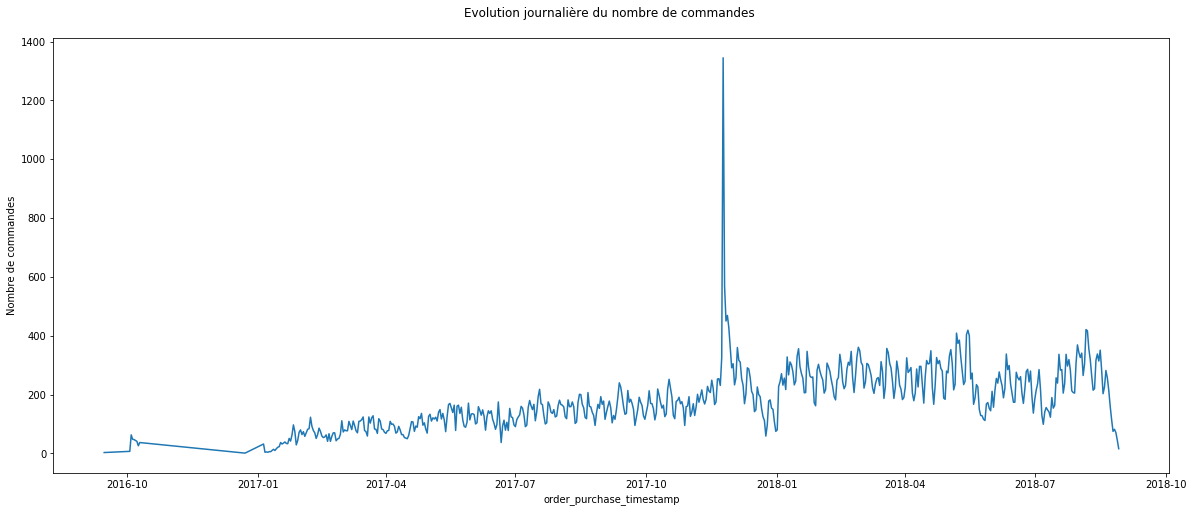

In [56]:
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot()
ax.set_ylabel("Nombre de commandes")
plt.title(f"Evolution journalière du nombre de commandes \n"
          )
plt.show()